In [110]:
import pandas as pd
import numpy as np
import requests
import selenium
import urllib3
from bs4 import BeautifulSoup
import regex as re
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:

url = 'https://pokemondb.net/pokedex/all'
r = requests.get(url)
all_pokemon = pd.read_html(r.text)

In [77]:
# get pokemon name to avoid repeats
all_pokemon[0][all_pokemon[0]['#'] == 6].head(1)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
6,6,Charizard,Fire Flying,534,78,84,78,109,85,100


In [78]:
all_pokemon[0]['#'].max()

1008

In [101]:
poke_df = pd.DataFrame()
# all_pokemon[0]['#'].max() + 1
for i in tqdm(range(1, all_pokemon[0]['#'].max() + 1)):

    #create concatenator dataframe
    temporary_df = pd.DataFrame()

    #pull pokemon name from list and exclude variations
    pokemon_name = all_pokemon[0][all_pokemon[0]['#'] == i].head(1).iloc[0,1]

    # scrape webpage
    url = 'https://pokemondb.net/pokedex/{}'.format(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    # get a list of descriptions
    desc = soup.find_all("td",{"class": "cell-med-text"})
    desc_list = []

    for j in range(len(desc)):
        desc_list.append(str(soup.find_all("td",{"class": "cell-med-text"})[j]).
        replace('<td class="cell-med-text">','').
        replace('</td>',''))
    temporary_df['Pokemon'] = [pokemon_name] * len(desc)
    temporary_df['Description'] = desc_list

    poke_df = pd.concat([poke_df,temporary_df])

    

100%|██████████| 1008/1008 [07:45<00:00,  2.17it/s]


In [102]:
poke_df

,Pokemon,Description
0,Bulbasaur,A strange seed was planted on its back at birt...
1,Bulbasaur,It can go for days without eating a single mor...
2,Bulbasaur,The seed on its back is filled with nutrients....
3,Bulbasaur,It carries a seed on its back right from birth...
4,Bulbasaur,"While it is young, it uses the nutrients that ..."
...,...,...
3,Koraidon,It has similar characteristics to a creature d...
0,Miraidon,Much remains unknown about this creature. It r...
1,Miraidon,This seems to be the Iron Serpent mentioned in...
2,Miraidon,Its characteristics match those of a mysteriou...


In [103]:
poke_df.to_pickle('poke_df.pkl')

Text(7, 150, 'The percent of Pokemon with 10 entries or more is 54.76%')

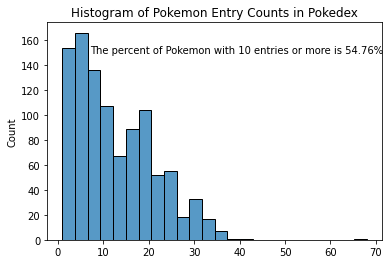

In [133]:
sns.histplot(poke_df[['Pokemon']].value_counts())
plt.title('Histogram of Pokemon Entry Counts in Pokedex')
plt.annotate('The percent of Pokemon with 10 entries or more is {}%'
.format(round(100*sum(poke_df[['Pokemon']].value_counts() >= 10)/len(poke_df[['Pokemon']].
value_counts()),2))
,xy = (7,150))


In [130]:
round(100*sum(poke_df[['Pokemon']].value_counts() <= 1)/len(poke_df[['Pokemon']].value_counts()),2)

0.6

1. 15% 2 or less
1. 0.6% only have one observations

In [132]:
poke_df[['Pokemon']].value_counts()

Pokemon         
Pikachu             68
Vivillon            42
Raichu              39
Gengar              37
Rotom               37
                    ..
Kleavor              1
Wyrdeer              1
Overqwil             1
Basculegion Male     1
Sneasler             1
Length: 1008, dtype: int64